# Spatial Visualization 2, work with netcdf files

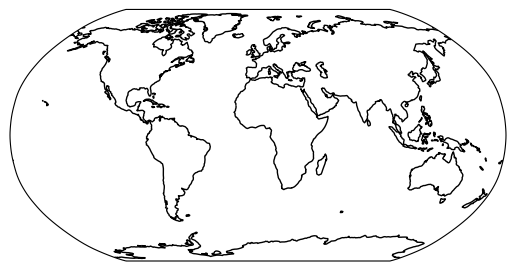

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# available projections
# https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections
    
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

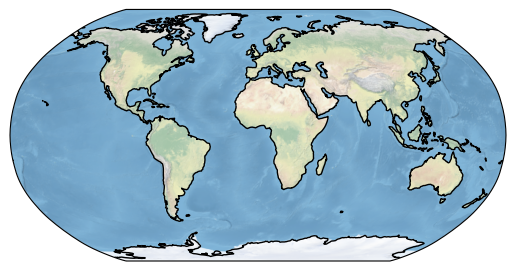

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# available projections
# https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections
    
ax = plt.axes(projection=ccrs.Robinson())
#add an underlay image to the map
ax.stock_img()
ax.coastlines()

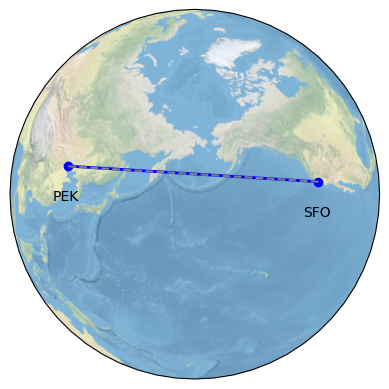

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-180, central_latitude=50))
ax.stock_img()

SFO_lon, SFO_lat = -122.3790, 37.6213
PEK_lon, PEK_lat = 116.4074, 39.9042

plt.plot([SFO_lon, PEK_lon], [SFO_lat, PEK_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.text(SFO_lon - 3, SFO_lat - 12, 'SFO',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(PEK_lon + 3, PEK_lat - 12, 'PEK',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

https://www.unidata.ucar.edu/software/netcdf/

NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data.

Data in netCDF format is:

- Self-Describing. A netCDF file includes information about the data it contains.
- Portable. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
- Scalable. Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
- Appendable. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
- Sharable. One writer and multiple readers may simultaneously access the same netCDF file.
- Archivable. Access to all earlier forms of netCDF data will be supported by current and future versions of the software.


In [56]:
import xarray as xr
ds = xr.open_dataset("../Lec11/amaps.nc")
ds

<xarray.Dataset>
Dimensions:      (lon: 180, lat: 90)
Coordinates:
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
Data variables:
    TEMPANOMALY  (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.1
    title:        GISTEMP Surface Temperature Analysis: January 2023 L-OTI(de...
    institution:  NASA Goddard Institute for Space Sciences
    source:       https://data.giss.nasa.gov/gistemp/
    history:      Created 2023-02-28 10:58 EST by amaps_netcdf.cgi 1.2 using ...

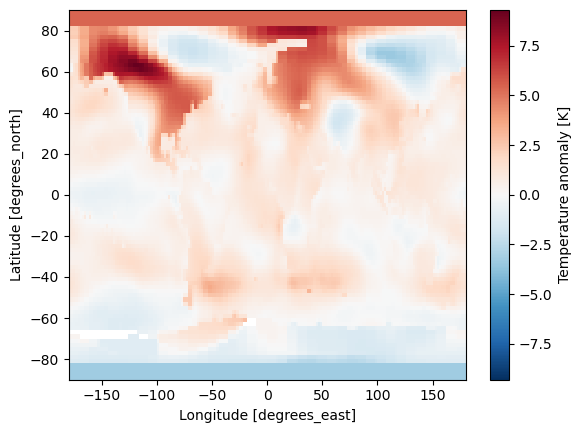

In [10]:
import cartopy.crs as ccrs

ta = ds["TEMPANOMALY"]
ta.plot()

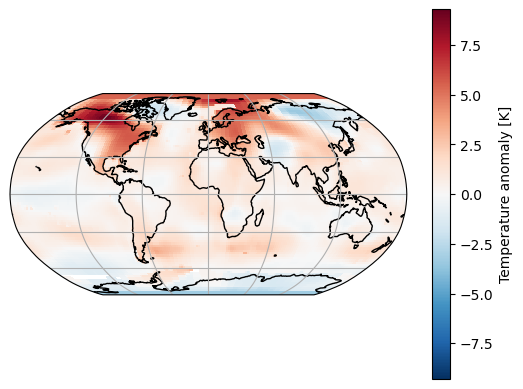

In [37]:
import cartopy.crs as ccrs

ta = ds["TEMPANOMALY"]

subplot_kws = dict(projection=ccrs.Robinson())
p = ta.plot(subplot_kws = subplot_kws,
       transform = ccrs.PlateCarree(),
       add_labels = True)

p.axes.gridlines()
p.axes.coastlines()

/Users/minchen/opt/anaconda3/envs/geo/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


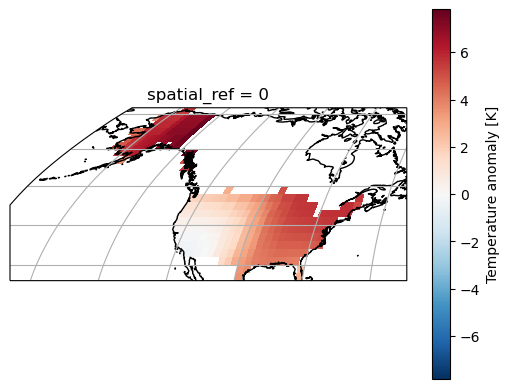

In [21]:
import geopandas as gpd
import rioxarray
world = gpd.read_file("../Lec11/World_Countries_shp/World_Countries__Generalized_.shp")
US = world.loc[world['COUNTRY'].isin(['United States'])]

ta = ta.rio.write_crs("epsg:4326")
US_ta = ta.rio.clip(US.geometry)

subplot_kws = dict(projection=ccrs.Robinson())
p = US_ta.plot(subplot_kws = subplot_kws,
       transform = ccrs.PlateCarree(),
       add_labels = True)

p.axes.gridlines()
p.axes.coastlines()

In [45]:
import xarray as xr
ds = xr.open_mfdataset('../Lec11/FLUXCOM/*.nc', concat_dim='time', combine='nested')
ds

LE = ds['LE']
LEmean = LE.mean(dim='time')
LEmean

<xarray.DataArray 'LE' (lat: 360, lon: 720)>
dask.array<mean_agg-aggregate, shape=(360, 720), dtype=float32, chunksize=(360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75

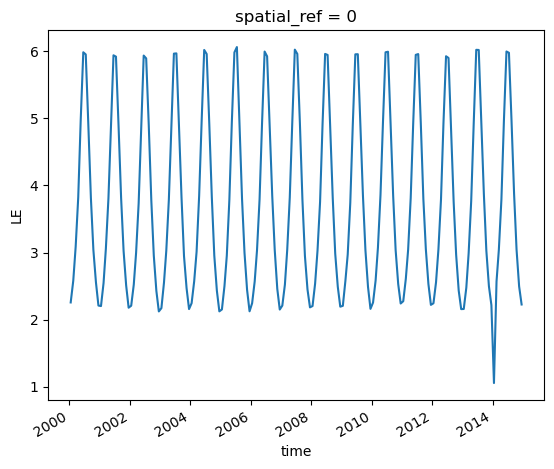

In [48]:
import xarray as xr
ds = xr.open_mfdataset('../Lec11/FLUXCOM/*.nc')
ds = ds.rio.write_crs("epsg:4326")
LE = ds['LE']
LEmeanlonlat = LE.mean(dim=['lon','lat'])
LEmeanlonlat.plot()

In [77]:
LE

import rioxarray
world = gpd.read_file("../Lec11/World_Countries_shp/World_Countries__Generalized_.shp")
US = world.loc[world['COUNTRY'].isin(['United States'])]

LE = LE.rio.write_crs("epsg:4326")
LE.rio.set_spatial_dims("lon","lat")
US_LE = LE.rio.clip(US.geometry)

US_LE

USLEmeanlonlat = US_LE.mean(dim=['lon','lat'])
USLEmeanlonlat.plot()

<xarray.DataArray 'LE' (time: 180, lat: 105, lon: 221)>
dask.array<getitem, shape=(180, 105, 221), dtype=float32, chunksize=(12, 105, 221), chunktype=numpy.ndarray>
Coordinates:
  * lon          (lon) float64 -177.2 -176.8 -176.2 ... -68.25 -67.75 -67.25
  * lat          (lat) float64 71.25 70.75 70.25 69.75 ... 20.25 19.75 19.25
  * time         (time) datetime64[ns] 2000-01-16 2000-02-16 ... 2014-12-16
    spatial_ref  int64 0
Attributes:
    units:      MJ m-2 day-1
    long_name:  latent heat

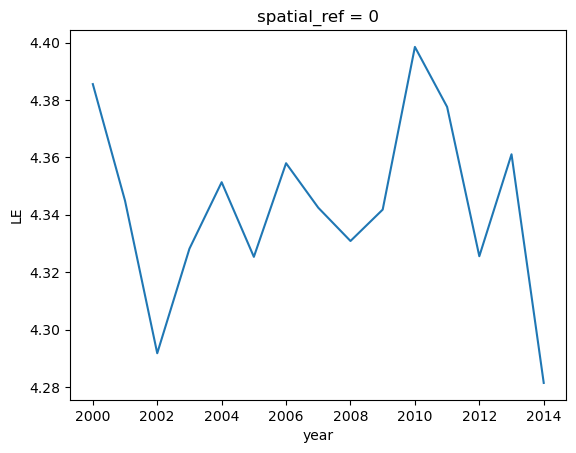

In [86]:
import numpy as np
LEyear = LE.groupby('time.year').mean('time')

weights = np.cos(np.deg2rad(LE.lat))
weights.name = "weights"
weights

LEyear_weighted = LEyear.weighted(weights)
LEyear_weighted

LEyear_weightedmean = LEyear_weighted.mean(("lon", "lat"))
LEyear_weightedmean.plot()